While we will have difficulty visualizing the loss function over the complete weight space, we can visualize it over a smaller space to begin to understand our approach. 

In [1]:
import numpy as np
%precision 1

'%.1f'

For the purposes of this visualization, let us consider a small random weight matrix $(2,p)$ for a binary classifier, i.e., one weight vector for each classifier.

We then generate a batch of random input vectors $X$ (with 6 parameters, and then a trailing bias) and and a vector of outputs. 

In [9]:
W = np.random.rand(2,7)  # random weight matrix
X = np.random.randint(2, size=(6,10))
X = np.vstack([X, np.ones(10)]) # append row of ones for biases
correct = np.random.randint(2,size=10)

In [11]:
W

array([[ 0.5,  0.7,  0. ,  1. ,  0.2,  0.6,  0.1],
       [ 0.8,  0.1,  0.2,  0.4,  0.4,  0.7,  0.7]])

Each column of $X$ is an input vector. 

In [10]:
X

array([[ 0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  0.],
       [ 1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

We then obtain our scores by multiplying 

$$\texttt{scores}=WX$$

Each column of the result is a score associated with the binary classifiers 

- `scores`$_{1,1}$ (`scores[0,0]` in `numpy`) is the score for the first input, first classifier
- `scores`$_{2,1}$ (`scores[1,0]` in `numpy`) is the score for the first input, second classifier. 

In [14]:
scores = W.dot(X)
scores

array([[ 1.1,  2.3,  2.6,  0.8,  2.4,  0.6,  0.8,  1.2,  2.4,  0.8],
       [ 1.3,  2.2,  2.4,  1.9,  2. ,  1.5,  0.8,  2.3,  2. ,  2.1]])

We turn this into a score function. 

In [18]:
def score_function(x,W):
    return W.dot(x)

In [248]:
def loss_function(y_batch,x_batch,W,delta=1.0,gamma=0.1):
    scores = score_function(x_batch,W)
    correct_score = scores[np.arange(len(scores)), y_batch]
    margins = np.maximum(0, scores.T - correct_score + delta)
    
    margins = margins.T
    margins[np.arange(len(margins)), y_batch] = 0
    
    return np.sum(margins, axis=1)

In [249]:
from numpy.linalg import norm

In [250]:
def loss_function_i(y,x,W,delta=1.0,gamma=0.1):
    scores = score_function(x,W)
    correct_score = scores[y]
    margins = np.maximum(0, scores - correct_score + delta)

    margins[y] = 0
    return np.sum(margins) + gamma*norm(W)

In [251]:
single_x = np.random.randint(2, size=(7))
single_x[6] = 1
single_y = np.random.randint(2)
single_y                           

0

In [252]:
single_x

array([1, 1, 1, 1, 1, 0, 1])

In [253]:
loss_function_i(single_y,single_x,W)

1.0

In [254]:
def loss_function_in_a_direction(a,p,weights):
    delta_W = np.zeros((2,7))
    delta_W[:,p] += int(a)*weights[:,p]
    return loss_function_i(single_y,single_x,weights+delta_W)

In [255]:
loss_function_in_a_direction(1,1,W)

1.6

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


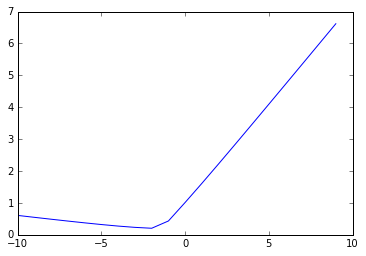

In [260]:
dep = [loss_function_in_a_direction(i,1,W) for i in range(-10,10)]
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(-10,10),dep)

In [139]:
score_function()

[0 1 2 3 4 5 6 7 8 9]


ValueError: operands could not be broadcast together with shapes (10,) (2,) 